In [94]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from numpy import random
from mpmath import mp
import time 
import math
import copy 
from tqdm import tqdm 

In [95]:
class envir():
    def __init__(self):
        self.p1=[]
        for i in range(10):
            self.p1.append(0.05*(i+1))
    def step(self,s,task):
            next_state = copy.copy(s)
            if s[task] == 0:
                next_state[task] = 0
            else:
                #print(s,task,get_prob(s[task],self.p1[task],self.lamda))
                next_state[task] = random.choice([0,s[task]],1,p=[self.p1[task],1-self.p1[task]])
            if s[task]!=0 and next_state[task] == 0:
                reward = 1
            elif s[task]==0:
                reward = -100
                print("sd")
            else:
                reward = 0
            return next_state,reward

def choose_arm(s,W,epsilon):
        wl= []
        p = np.array([0,0,0,0,0,0,0,0,0,0])
        if np.random.random() < epsilon:
            for i in range(len(p)):
                if s[i]!=0:
                    wl.append(i)
            arm_to_pull = np.random.choice(wl,1)[0]
            p[arm_to_pull] = 1
            return arm_to_pull
        else:
            p2 = {}
            for i in range(len(p)):
                if s[i]!=0:
                    p2[i] = W[s[i]][i]
            max_key = max(p2, key=p2.get)
            p[max_key] = 1
            return max_key    

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [01:15<00:00, 132.02it/s]


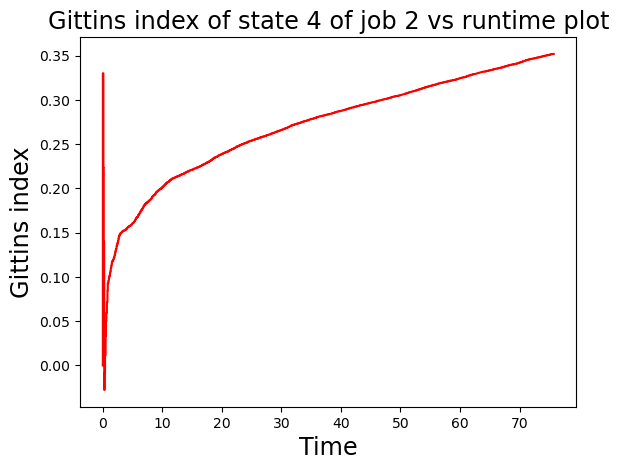

In [116]:
def get_action(task):
    a = [0]*10
    a[task] = 1
    return a

def get_reward(task,r):
    a = [0]*10
    a[task] = r
    return a

class game():
    gamma = 0.99
    action = np.zeros(10)
    state = np.zeros(10)
    Q = np.zeros((2,2,2,10))

    hist0 = []
    hist1 = []
    hist2 = []

    W = np.zeros((2,10))
    eps_start = 1
    eps = eps_start
    s = np.array([1,1,1,1,1,1,1,1,1,1])
    episodes = 10000
    eps_decay = 0.99999
    rate = 1
    start_time = time.time()
    t = []
    hist = []
    beta = 1
    env = envir()
    tries = 0
    for episode_no in tqdm(range(episodes)):
        s = np.array([1,1,1,1,1,1,1,1,1,1])
        eps = max(eps*eps_decay,0.1)
        if episode_no==0:
            learning_rate = 0.01
        if episode_no>=1:
            learning_rate = 0.01 / math.ceil(episode_no / 45)
            if(episode_no%10==0):
                beta = 0.008 / math.ceil(episode_no / 45)
            else:
                beta = 0
        #print(tries, episode_no)
        tries = 0
        while (s[0]!=0 or s[1]!=0 or s[2]!=0 or s[3]!=0 or s[4]!=0 or s[5]!=0 or s[6]!=0 or s[7]!=0 or s[8]!=0 or s[9]!=0):
            tries += 1
            task = choose_arm(copy.copy(s),copy.copy(W),eps)
            action = get_action(task)
            next_state,r = env.step(copy.copy(s),task)
            reward = get_reward(task,r)
            '''print("Current state:",s)
            print("Action:",action)
            print("Next state:",next_state)
            print("Reward:",reward)'''
            inde = 0
            current_time = time.time()-start_time
            hist.append(W[1][5])
            t.append(current_time)
            if episode_no%10==0:
                rate = rate - 0.00002        
            for i in range(10):
                for k in range(1,2):
                    Q[s[i]][action[i]][k][i] += learning_rate*((1-action[i])*(reward[i]+W[k][i])+action[i]*reward[i]+gamma*(max(Q[next_state[i]][0][k][i],Q[next_state[i]][1][k][i]))-Q[s[i]][action[i]][k][i])
            for i in range(10):
                for k in range(1,2):
                        W[k][i] += beta*(Q[k][1][k][i]-Q[k][0][k][i])
                        '''if k==4 and i==1 and beta!=0:
                            print("W",W[4][1])
                            print("Q1",Q[k][1][k][i])
                            print("Q0",Q[k][0][k][i])
                            print("\n")'''
            '''a = task
            print("Q1",Q[0][1][0][a])
            print("Q0",Q[0][0][0][a])
            print("W",W[0][a])'''            
            s = next_state
    plt.title('Gittins index of state 4 of job 2 vs runtime plot',fontsize='xx-large')
    plt.xlabel('Time', fontsize = 'xx-large')
    plt.ylabel('Gittins index',fontsize = 'xx-large')
    plt.plot(t,hist,'-',c='red')
    plt.show()

In [92]:
print(game.hist)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.07, 0.08, 0.09, 0.09999999999999999, 0.10999999999999999, 0.11999999999999998, 0.12999999999999998, 0.13999999999999999, 0.15, 0.16, 0.17, 0.18000000000000002, 0.19000000000000003, 0.20000000000000004, 0.21000000000000005, 0.22000000000000006, 0.23000000000000007, 0.24000000000000007, 0.25000000000000006, 0.26000000000000006, 0.2700000000000001, 0.2800000000000001, 0.2900000000000001, 0.3000000000000001, 0.3100000000000001, 0.3200000000000001, 0.3300000000000001, 0.34000000000000014, 0.35000000000000014, 0.36000000000000015, 0.37000000000000016, 0.38000000000000017, 0.3900000000000002, 0.4000000000000002, 0.4100000000000002, 0.4200000000000002, 0.4300000000000002, 0.4400000000000002, 0.45000000000000023, 0.46000000000000024, 0.47000000000000025, 0.48000000000000026, 0.49000000000000027, 0.5000000000000002, 0.5100000000000002, 0.5200000000000002, 0.5300000000000002, 0.

In [117]:
import csv

csv_file_path = 'whittles_indices_const_HR.csv'

# Write the two lists to the CSV file side by side
with open(csv_file_path, 'w', newline='') as csv_file:
    csv_writer = csv.writer(csv_file)
    csv_writer.writerow(['time', 'Values'])  # Optional header row
    csv_writer.writerows(zip(game.t, game.hist))

print(f"The two lists have been saved to {csv_file_path}")

The two lists have been saved to whittles_indices_const_HR.csv
